# Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import datetime
import psycopg2

# 1. Introduction

In this project, our aim is to implement a number of machine learning models to answer  our research question on the AI Tools  dataset.

- Research Question: Which predictors and criterion contribute to a good predictive model for AI tool success?

During this theis project we consolidate the knowledge by building a variety of machine learning models independently.

# Prelimenary Data Exploration

A lot of data has been gathered with a lot of features. For the research the features that will be analyzed will be selected.

In [28]:
# load data
file_path1 = '/Users/macbook/thesis/new/code/data/processed_data/final.csv'
file_path2 = '/Users/macbook/thesis/new/code/data/processed_data/reviews_data.csv'

gen = pd.read_csv(file_path1)
rev = pd.read_csv(file_path2)


/var/folders/lz/910twyk903nb6sxfgz54bngc0000gn/T/ipykernel_8748/1714893796.py:5: DtypeWarning: Columns (13,18,21) have mixed types. Specify dtype option on import or set low_memory=False.
  gen = pd.read_csv(file_path1)


In [29]:
#merge two datasets on tool_id
df_fin = pd.merge(gen, rev, on='tool_id', how='left')

In [8]:
print(rev.shape)
print(gen.shape)
print(df_fin.shape)

(50705, 13)
(10569, 69)
(50359, 81)


# 5.  Natural Language Processing

Results are based on classifier 11 from the local_llm folder  -> classifier.py

Please refer to /Users/macbook/thesis/classifier for the Modelfile.

## Classifier 8

In [17]:
import pandas as pd
import re

# Load the dataset
data = pd.read_csv('/Users/macbook/thesis/new/code/data/processed_data/classified_data.csv')

# Assuming the LLM responses are in a column named 'llm_response'. Adjust if it's different.
if 'llm_response' not in data.columns:
    raise ValueError("The column 'llm_response' does not exist in the dataset.")

def extract_top_two_categories(response):
    category_probs = re.findall(r'(\d+): (\d\.\d+)', response)
    if not category_probs:
        return [("Error", 0), ("Error", 0)]

    category_probs.sort(key=lambda x: x[1], reverse=True)
    return category_probs[:2]

# Extract top two categories from the LLM responses
top_two_category_preds = [extract_top_two_categories(resp) for resp in data['llm_response']]

# Create new columns for top two categories and the category with the highest probability
data['top_two_categories'] = [f"{cat1[0]}: {cat1[1]}, {cat2[0]}: {cat2[1]}" for cat1, cat2 in top_two_category_preds]
data['highest_category'] = [cats[0][0] for cats in top_two_category_preds]

# Convert both columns to the same data type for accurate comparison
data['highest_category'] = data['highest_category'].astype(str)
data['actual_category'] = data['actual_category'].astype(str)

# Convert both columns to the same data type for accurate comparison
data['highest_category'] = data['highest_category'].astype(float)
data['actual_category'] = data['actual_category'].astype(float)

# Add a column for comparison
data['is_correct_prediction'] = data['highest_category'] == data['actual_category']

# Calculate accuracy
accuracy = data['is_correct_prediction'].mean()

# Display the results
print(f"Accuracy of the LLM's predictions with classifier 8 is: {accuracy:.2%}")
print(data[['tool_id', 'top_two_categories', 'actual_category', 'highest_category', 'is_correct_prediction']])

# Decision based on accuracy
if accuracy > 0.7:
    print("The LLM's predictions are accurate enough for this task.")
else:
    print("The LLM's predictions are not accurate enough for this task.")


Accuracy of the LLM's predictions with classifier 8 is: 27.85%
    tool_id top_two_categories  actual_category  highest_category  \
0    8720.0   1: 0.95, 6: 0.75              1.0               1.0   
1    7985.0  10: 0.95, 3: 0.87              3.0              10.0   
2    8200.0   9: 0.98, 0: 0.95              9.0               9.0   
3    8872.0   8: 0.90, 3: 0.85              4.0               8.0   
4    8591.0   7: 0.98, 0: 0.95              7.0               7.0   
..      ...                ...              ...               ...   
74   9026.0   1: 0.95, 6: 0.85              3.0               1.0   
75   1071.0   1: 0.95, 4: 0.75              3.0               1.0   
76   6769.0   6: 0.98, 1: 0.95              3.0               6.0   
77   8503.0   7: 0.98, 8: 0.95              8.0               7.0   
78   7467.0   1: 0.95, 3: 0.84              3.0               1.0   

    is_correct_prediction  
0                    True  
1                   False  
2                    Tru

## Classifier 10

In [ ]:
# Load the dataset
data = pd.read_csv('/Users/macbook/thesis/new/code/data/processed_data/classified_data_test.csv')

# Assuming the LLM responses are in a column named 'llm_response'. Adjust if it's different.
if 'llm_response' not in data.columns:
    raise ValueError("The column 'llm_response' does not exist in the dataset.")

def extract_top_two_categories(response):
    category_probs = re.findall(r'(\d+): (\d\.\d+)', response)
    if not category_probs:
        return [("Error", 0), ("Error", 0)]

    category_probs.sort(key=lambda x: x[1], reverse=True)
    return category_probs[:2]

# Extract top two categories from the LLM responses
top_two_category_preds = [extract_top_two_categories(resp) for resp in data['llm_response']]

# Create new columns for top two categories and the category with the highest probability
data['top_two_categories'] = [f"{cat1[0]}: {cat1[1]}, {cat2[0]}: {cat2[1]}" for cat1, cat2 in top_two_category_preds]
data['highest_category'] = [cats[0][0] for cats in top_two_category_preds]

# Convert both columns to the same data type for accurate comparison
data['highest_category'] = data['highest_category'].astype(str)
data['actual_category'] = data['actual_category'].astype(str)

# Convert both columns to the same data type for accurate comparison
data['highest_category'] = data['highest_category'].astype(float)
data['actual_category'] = data['actual_category'].astype(float)

# Add a column for comparison
data['is_correct_prediction'] = data['highest_category'] == data['actual_category']

# Calculate accuracy
accuracy = data['is_correct_prediction'].mean()

# Display the results
print(f"Accuracy of the LLM's predictions with classifier 10 is: {accuracy:.2%}")
print(data[['tool_id', 'top_two_categories', 'actual_category', 'highest_category', 'is_correct_prediction']])

# Decision based on accuracy
if accuracy > 0.7:
    print("The LLM's predictions are accurate enough for this task.")
else:
    print("The LLM's predictions are not accurate enough for this task.")


Accuracy of the LLM's predictions with classifier 10 is: 42.31%
    tool_id top_two_categories  actual_category  highest_category  \
0      8720   1: 0.98, 4: 0.75              1.0               1.0   
1      8200   9: 0.98, 0: 0.95              9.0               9.0   
2      8591   7: 0.99, 0: 0.95              7.0               7.0   
3      6586   0: 0.95, 9: 0.05              0.0               0.0   
4      4737   3: 0.45, 2: 0.30              4.0               3.0   
..      ...                ...              ...               ...   
73    11428   8: 0.99, 7: 0.98              8.0               8.0   
74    11440   7: 0.85, 8: 0.50              8.0               7.0   
75    11449   6: 0.98, 1: 0.05              0.0               6.0   
76    11457   6: 0.98, 4: 0.95              5.0               6.0   
77    11476   2: 0.95, 1: 0.02              2.0               2.0   

    is_correct_prediction  
0                    True  
1                    True  
2                    Tr

## Classifier 11

In [ ]:
# Load the dataset
data = pd.read_csv('/Users/macbook/thesis/new/code/data/processed_data/classified_data_test.csv')

# Assuming the LLM responses are in a column named 'llm_response'. Adjust if it's different.
if 'llm_response' not in data.columns:
    raise ValueError("The column 'llm_response' does not exist in the dataset.")

def extract_top_two_categories(response):
    category_probs = re.findall(r'(\d+): (\d\.\d+)', response)
    if not category_probs:
        return [("Error", 0), ("Error", 0)]

    category_probs.sort(key=lambda x: x[1], reverse=True)
    return category_probs[:2]

# Extract top two categories from the LLM responses
top_two_category_preds = [extract_top_two_categories(resp) for resp in data['llm_response']]

# Create new columns for top two categories and the category with the highest probability
data['top_two_categories'] = [f"{cat1[0]}: {cat1[1]}, {cat2[0]}: {cat2[1]}" for cat1, cat2 in top_two_category_preds]
data['highest_category'] = [cats[0][0] for cats in top_two_category_preds]
data['second_highest_category'] = [cats[1][0] for cats in top_two_category_preds]

# Convert all columns to the same data type for accurate comparison
data['highest_category'] = data['highest_category'].astype(float)
data['second_highest_category'] = data['second_highest_category'].astype(float)
data['actual_category'] = data['actual_category'].astype(float)

# Add a column for comparison
data['is_correct_prediction'] = data['highest_category'] == data['actual_category']

# Calculate accuracy
accuracy = data['is_correct_prediction'].mean()

# Display the results
print(f"Accuracy of the LLM's predictions with classifier 10 is: {accuracy:.2%}")
print(data[['tool_id', 'top_two_categories', 'actual_category', 'highest_category', 'is_correct_prediction']])

# Decision based on accuracy
if accuracy > 0.7:
    print("The LLM's predictions are accurate enough for this task.")
else:
    print("The LLM's predictions are not accurate enough for this task.")


Accuracy of the LLM's predictions with classifier 11 is: 74.36%
    tool_id top_two_categories  actual_category  highest_category  \
0      8720   1: 0.98, 4: 0.75              1.0               1.0   
1      8200   9: 0.98, 0: 0.95              9.0               9.0   
2      8591   7: 0.99, 0: 0.95              7.0               7.0   
3      6586   0: 0.95, 9: 0.05              0.0               0.0   
4      4737   3: 0.45, 2: 0.30              4.0               3.0   
..      ...                ...              ...               ...   
73    11428   8: 0.99, 7: 0.98              8.0               8.0   
74    11440   7: 0.85, 8: 0.50              8.0               7.0   
75    11449   6: 0.98, 1: 0.05              0.0               6.0   
76    11457   6: 0.98, 4: 0.95              5.0               6.0   
77    11476   2: 0.95, 1: 0.02              2.0               2.0   

    second_highest_category  is_correct_prediction  
0                       4.0                   True  
1

## 2. Converging to categories from LLM response

####  <span style="color:green;font-weight:bold;">Feature 5: Category </span>


In [3]:
import pandas as pd
import re

# Load the dataset
data2 = pd.read_csv('/Users/macbook/thesis/new/code/data/processed_data/cd2.csv')

# Assuming the LLM responses are in a column named 'llm_response'. Adjust if it's different.
if 'llm_response' not in data2.columns:
    raise ValueError("The column 'llm_response' does not exist in the dataset.")

def extract_top_two_categories(response):
    category_probs = re.findall(r'(\d+): (\d\.\d+)', response)
    if not category_probs:
        return [("Error", 0), ("Error", 0)]

    category_probs.sort(key=lambda x: x[1], reverse=True)
    return category_probs[:2]

# Extract top two categories from the LLM responses
top_two_category_preds = [extract_top_two_categories(resp) for resp in data2['llm_response']]

# Create new columns for top two categories and the category with the highest probability
data2['top_two_categories'] = [f"{cat1[0]}: {cat1[1]}, {cat2[0]}: {cat2[1]}" for cat1, cat2 in top_two_category_preds]
data2['highest_category'] = [cats[0][0] for cats in top_two_category_preds]

# Convert both columns to the same data type for accurate comparison
data2['highest_category'] = data2['highest_category'].astype(str)

# Convert both columns to the same data type for accurate comparison

print(data2[['tool_id', 'top_two_categories','highest_category']])

#count values of highest category
print(data2['highest_category'].value_counts())

     tool_id top_two_categories highest_category
0       1329   0: 1.00, 9: 1.00                0
1       8526   1: 0.98, 6: 0.95                1
2       8870   1: 0.95, 3: 0.04                1
3       4242  10: 0.95, 3: 0.60               10
4       8578   8: 0.95, 2: 0.80                8
..       ...                ...              ...
995     7586   7: 0.98, 2: 0.05                7
996     4269   1: 0.95, 4: 0.85                1
997     8028   3: 0.95, 2: 0.05                3
998     4581   1: 0.95, 3: 0.04                1
999     8310   1: 0.95, 6: 0.08                1

[1000 rows x 3 columns]
highest_category
1     296
3     247
8     102
6      86
2      68
9      65
7      61
10     29
0      21
5      19
4       6
Name: count, dtype: int64


Merging LLM predictions with main dataset

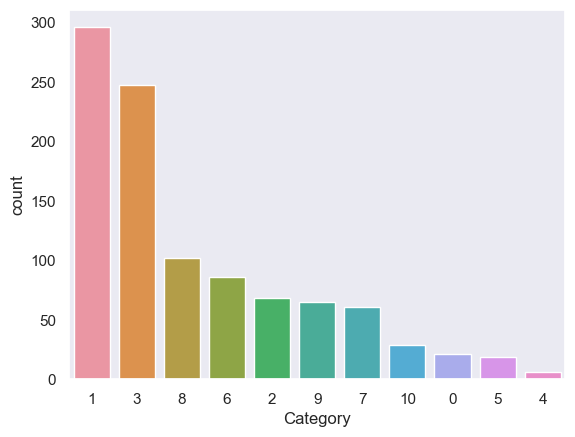

In [12]:
# Visualize highest category in descending order
sns.set(style="dark")
ax = sns.countplot(x="highest_category", data=data2, order=data2['highest_category'].value_counts().index)
ax.set(xlabel="Category")
plt.show()


In [27]:
# keep only the highest category 
data2['category'] = data2['highest_category']
data2['category'] = data2['category'].astype(int)
data2 = data2[['tool_id', 'category']]

# combine the two datasets
combined_data = pd.concat([data, data2]).drop_duplicates(subset='tool_id')

In [40]:
#keep tool_id and category
df = pd.merge(df, combined_data, on='tool_id', how='left')

In [43]:
# count amount of rows filled with category
df['category'].value_counts()
print(df['category'].notnull().sum())

df.to_csv('/Users/macbook/thesis/new/code/data/processed_data/category_df2.csv', index=False)

1283


In [36]:
# code retrieved from https://www.datacamp.com/community/tutorials/tutorial-postgresql-python


# Connect to the database
conn = psycopg2.connect(host="localhost",database="1", user="postgres", password="katse")

# Create a cursor object
cur = conn.cursor()

# Iterate over DataFrame and update the database
for index, row in df.iterrows():
    cur.execute("UPDATE tool_category SET application_type = %s WHERE tool_id = %s", 
                (row['category'], row['tool_id']))

# Commit changes and close the connection
conn.commit()
cur.close()
conn.close()

NumericValueOutOfRange: integer out of range


# Conclusion


Classifier 11 has an accuracy of 74%, so we will use that for our analysis.

Results are based on classifier 11 from the local_llm folder  -> classifier.py

Please refer to /Users/macbook/thesis/classifier for the Modelfile.